In [ ]:
# 1. Areas of higher population density (e.g. cities) generally have more rides and relatively lower fares than 
#    areas of lower population density (e.g. suburban and rural areas). Economy of scales holds true when it comes to relationship
#    between number of rides and average ride fare.
# 2. Almost two thirds (62.7%) of Pyber's revenue come from the urban area and one third (30.5%) from the suburban area. Rural 
#    areas account for immaterial portion of Pyber's total revenue. Population density and revenue see very high relevance. 
# 3. Four out of five (80.9%) Pyber drivers come from urban areas. Rural areas only account for 2.6% of total Pyber drivers. This
#    again shows that urban/suburban areas where population density is high see more demands for Pyber drivers.  

In [1]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load (Remember to change these)
citydata = "../Unit 5  Assignment - The Power of Plots/city_data.csv"
ridedata = "../Unit 5  Assignment - The Power of Plots/ride_data.csv"

# Read the City and Ride Data
cityfile=pd.read_csv(citydata,encoding="utf8")
ridefile=pd.read_csv(ridedata,encoding="utf8")
# Combine the data into a single dataset
comfile=pd.merge(ridefile,cityfile,on="city",how="outer")
# Display the data table for preview
comfile.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

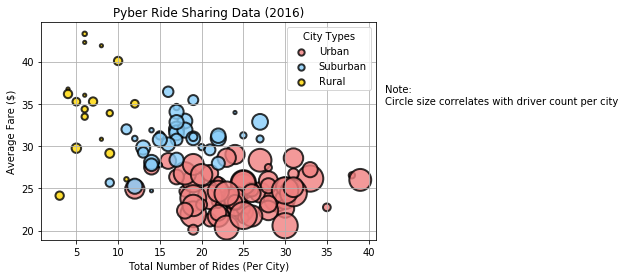

In [2]:
# Obtain the x and y coordinates for each of the three city types
citycomfile=comfile.groupby(["type","city"])
ridecount=citycomfile["ride_id"].count()
avgfare=citycomfile["fare"].mean()
drivercount=citycomfile["driver_count"].mean()
citytype=comfile["type"].unique()

# Build the scatter plots for each city types
plt.scatter(ridecount["Urban"],avgfare["Urban"],alpha=0.8,linewidths=2,s=drivercount["Urban"]*10,marker="o",label="Urban",edgecolors="black",color="lightcoral")
plt.scatter(ridecount["Suburban"],avgfare["Suburban"],alpha=0.8,linewidths=2,s=drivercount["Suburban"]*10,marker="o",label="Suburban",edgecolors="black",color="lightskyblue")
plt.scatter(ridecount["Rural"],avgfare["Rural"],alpha=0.8,linewidths=2,s=drivercount["Rural"]*10,marker="o",label="Rural",edgecolors="black",color="gold")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Create a legend
lgnd=plt.legend(title="City Types")
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note:\nCircle size correlates with driver count per city")

# Save Figure
plt.savefig("../Unit 5  Assignment - The Power of Plots/Pyber Ride Sharing Date (2016).png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

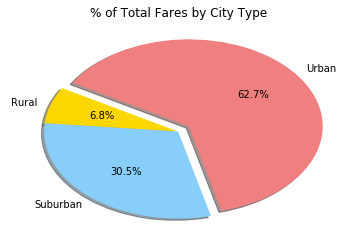

In [14]:
# Calculate Type Percents
typecomfile=comfile.groupby(["type"])
totalfare=typecomfile["fare"].sum()

# Build Pie Chart
explode=(0,0,0.1)
color=["gold","lightskyblue","lightcoral"]
plt.pie(totalfare,labels=["Rural","Suburban","Urban"],explode=explode,startangle=150,colors=color,autopct="%1.1f%%",shadow=True)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Unit 5  Assignment - The Power of Plots/Farepercity.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

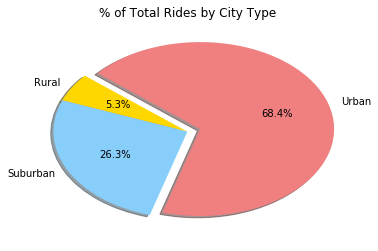

In [13]:
# Calculate Ride Percents
typecomfile=comfile.groupby(["type"])
totalride=typecomfile["ride_id"].count()

# Build Pie Chart
color=["gold","lightskyblue","lightcoral"]
explode=(0,0,0.1)
plt.pie(totalride,startangle=140,labels=["Rural","Suburban","Urban"],autopct="%1.1f%%",shadow=True,colors=color,explode=explode)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Unit 5  Assignment - The Power of Plots/Ridespercity.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

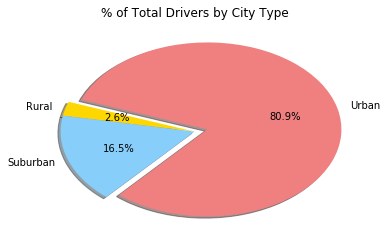

In [12]:
# Calculate Driver Percents
drivercount=citycomfile["driver_count"].mean()
totaldriver=[drivercount[type].sum() for type in ["Rural","Suburban","Urban"]]

# Build Pie Charts
color=["gold","lightskyblue","lightcoral"]
explode=(0,0,0.1)
chart=plt.pie(totaldriver,labels=["Rural","Suburban","Urban"],explode=explode,colors=color,autopct="%1.1f%%",startangle=160,shadow=True)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Unit 5  Assignment - The Power of Plots/driverpercity.png")

In [9]:
# Show Figure
plt.show()